# Probabilistic Forward Modeling

$\delta^{18}O_{\text{b}} = D + S $

$D = \delta^{18}O_{\text{internal}} + (-0.245 T + 0.0011T^2 + 3.58)$ (The M14 PSM)

$S = \delta^{18}O_{\text{ice volume}} - 1.5435\text{DpH}$

In [1]:
%load_ext autoreload
%autoreload 2

import os
import seaborn as sns
import x4c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
print(x4c.__version__)
os.chdir('/glade/work/fengzhu/Projects/paper-MCO_iCESM/notebooks')
!hostname
import BayesianEst as be

x4c.set_style('journal_spines', font_scale=1.2)

2025.6.14
crhtc76


WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [2]:
d18Osw_sigma = 0.1
DpH_sigma = 0.05
res = be.get_est(d18Osw_mu=-0.55, d18Osw_sigma=d18Osw_sigma, DpH_mu=-0.2, DpH_sigma=DpH_sigma)
d18Osw_mu_range = np.linspace(-1.0, 0, 11)
# pH_mu_range = np.linspace(7.4, 7.8, 9)
DpH_mu_range = np.linspace(-0.3, 0, 7)

res_list = []
for d18Osw_mu in d18Osw_mu_range:
    for DpH_mu in DpH_mu_range:
        res = be.get_est(d18Osw_mu=d18Osw_mu, d18Osw_sigma=d18Osw_sigma, DpH_mu=DpH_mu, DpH_sigma=DpH_sigma)
        res_list.append({
            'd18Osw_mu': d18Osw_mu,
            'DpH_mu': DpH_mu,
            'dGMST': res['dGMST']['mle'],
        })

df = pd.DataFrame(res_list)
d18Osw_val = df['d18Osw_mu'].values
DpH_val = df['DpH_mu'].values
subset = df[(df['d18Osw_mu'] == d18Osw_val) & (df['DpH_mu'] == DpH_val)]
pivot = subset.pivot(index='d18Osw_mu', columns='DpH_mu', values='dGMST')
pivot

DpH_mu,-0.30,-0.25,-0.20,-0.15,-0.10,-0.05,0.00
d18Osw_mu,,,,,,,
-1.0,6.6,6.2,5.9,5.6,5.5,5.4,5.3
-0.9,7.1,6.7,6.3,6.0,5.7,5.5,5.4
-0.8,7.6,7.2,6.8,6.5,6.1,5.7,5.5
-0.7,8.1,7.7,7.3,6.9,6.6,6.2,5.8
-0.6,8.5,8.2,7.8,7.4,7.0,6.7,6.3
-0.5,9.0,8.7,8.3,7.9,7.5,7.2,6.8
-0.4,9.5,9.2,8.8,8.4,8.0,7.6,7.3
-0.3,10.0,9.6,9.3,8.9,8.5,8.1,7.8
-0.2,10.5,10.1,9.8,9.4,9.0,8.6,8.2


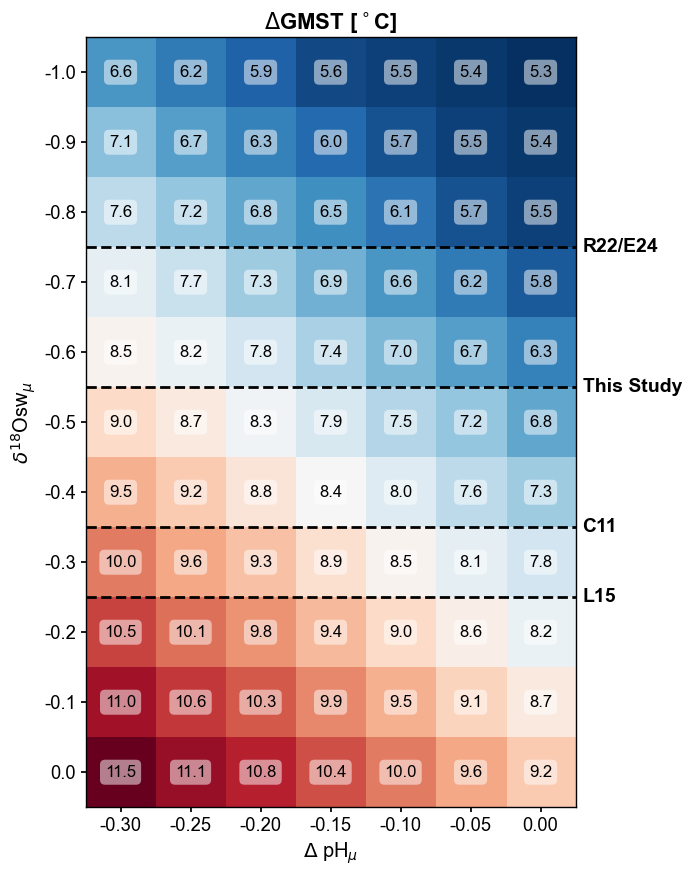

Figure saved at: "../figs/SIFig.03.pdf"


In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(pivot, cmap='RdBu_r', interpolation='nearest')
skip = 1
ax.set_xticks(np.arange(len(DpH_mu_range))[::skip])
ax.set_yticks(np.arange(len(d18Osw_mu_range))[::skip])
ax.set_xticklabels([f'{x:.2f}' for x in DpH_mu_range[::skip]])
ax.set_yticklabels([f'{y:.1f}' for y in d18Osw_mu_range[::skip]])
ax.set_ylabel(r'$\delta^{18}$Osw$_{\mu}$')
ax.set_xlabel(r'$\Delta$ pH$_{\mu}$')
for i in range(len(d18Osw_mu_range)):
    for j in range(len(DpH_mu_range)):
        text = ax.text(
            j, i, f'{pivot.values[i, j]:.1f}', ha='center', va='center', color='k', fontsize=12,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.5, boxstyle='round,pad=0.3')
        )
ax.grid(False)
ax.set_title(r'$\Delta$GMST [$^\circ$C]', fontsize=16, weight='bold')

ax.text(6.6, 2.5, 'R22/E24', fontsize=14, weight='bold', transform=ax.transData, va='center', ha='left')
ax.axhline(2.5, color='k', lw=2, ls='--')

ax.text(6.6, 6.5, 'C11', fontsize=14, weight='bold', transform=ax.transData, va='center', ha='left')
ax.axhline(6.5, color='k', lw=2, ls='--')

ax.text(6.6, 7.5, 'L15', fontsize=14, weight='bold', transform=ax.transData, va='center', ha='left')
ax.axhline(7.5, color='k', lw=2, ls='--')

ax.text(6.6, 4.5, 'This Study', fontsize=14, weight='bold', transform=ax.transData, va='center', ha='left')
ax.axhline(4.5, color='k', lw=2, ls='--')

x4c.showfig(fig)
x4c.savefig(fig, '../figs/SIFig.03.pdf')